In [13]:

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18006475944959539082
]


In [14]:
# initialising the cnn
klasifikasi = Sequential()

# step 1 - convolution
klasifikasi.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))
print("Convolution of layer 1 Completed")


# step 2 - pooling
klasifikasi.add(MaxPooling2D(pool_size=(2, 2)))
print("Pooling Completed")

# adding a second convolution layer
klasifikasi.add(Convolution2D(32, 3, 3, activation='relu'))
klasifikasi.add(MaxPooling2D(pool_size=(2, 2)))



# step 3 - flattening
klasifikasi.add(Flatten())
print("Flattening Completed")

# step 4 -full connection
klasifikasi.add(Dense(units = 128, activation = 'relu'))
klasifikasi.add(Dense(output_dim = 128, activation='relu'))
klasifikasi.add(Dense(units = 8, activation = 'softmax'))
print("Full Connection Between Hidden Layers and Output Layers Completed")





# kompile cnn
klasifikasi.compile(optimizer='adam', loss='categorical_crossentropy', metrics= ['accuracy'])
print("Compiling Initiated")


Convolution of layer 1 Completed
Pooling Completed
Flattening Completed
Full Connection Between Hidden Layers and Output Layers Completed
Compiling Initiated


/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """
/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/Users/fadlimuharram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`


In [15]:
# part 2 -fitting the cnn to images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_directory(
        '../tomat/color/dummy/training_set',
        target_size=(64, 64),
        batch_size=8,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        '../tomat/color/dummy/testing_set',
        target_size=(64, 64),
        batch_size=8,
        class_mode='categorical')



Found 800 images belonging to 8 classes.
Found 400 images belonging to 8 classes.


In [17]:
datanya = klasifikasi.fit_generator(
        train_set,
        steps_per_epoch=800,
        epochs=10,
        validation_data=test_set,
        validation_steps=400)
print("Compiling Completed")

Epoch 1/10
800/800 [==============================] - 31s 39ms/step - loss: 0.6688 - acc: 0.7548 - val_loss: 0.8150 - val_acc: 0.7425
Epoch 2/10
800/800 [==============================] - 32s 41ms/step - loss: 0.3679 - acc: 0.8672 - val_loss: 1.2207 - val_acc: 0.6775
Epoch 3/10
800/800 [==============================] - 33s 41ms/step - loss: 0.2034 - acc: 0.9275 - val_loss: 1.0261 - val_acc: 0.7625
Epoch 4/10
800/800 [==============================] - 40s 50ms/step - loss: 0.1694 - acc: 0.9425 - val_loss: 1.1641 - val_acc: 0.7275
Epoch 5/10
800/800 [==============================] - 43s 54ms/step - loss: 0.1402 - acc: 0.9519 - val_loss: 1.2924 - val_acc: 0.7150
Epoch 6/10
800/800 [==============================] - 38s 48ms/step - loss: 0.1022 - acc: 0.9662 - val_loss: 1.1838 - val_acc: 0.7550
Epoch 7/10
800/800 [==============================] - 39s 49ms/step - loss: 0.0910 - acc: 0.9719 - val_loss: 1.3342 - val_acc: 0.7725
Epoch 8/10
800/800 [==============================] - 41s 51ms

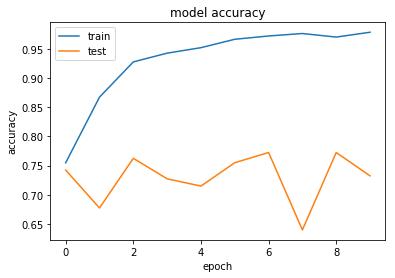

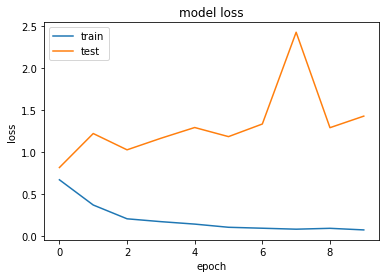

In [18]:
import matplotlib.pyplot as plt

plt.plot(datanya.history['acc'])
plt.plot(datanya.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# history untuk loss
plt.plot(datanya.history['loss'])
plt.plot(datanya.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()